Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [30]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [31]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [32]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [36]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1b51baf9270>,
 'caps': [<matplotlib.lines.Line2D at 0x1b51baf9690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b51baf8fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b51baf9bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b51baf9e70>],
 'means': []}

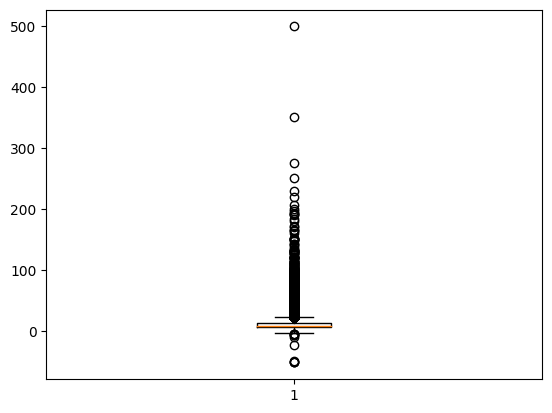

In [38]:
plt.boxplot(df['fare_amount'])

In [39]:
#OUTLIER REMOVAL

#calulation of quartiles
q1 = np.percentile(df['fare_amount'], 25)
q3 = np.percentile(df['fare_amount'], 75)

#IQR
IQR=q3-q1

#Calculating upper and lower limit
low=IQR - 1.5*q1
upper=IQR + 1.5*q3

# removaing outliers
df= df[(df['fare_amount'] > low) & (df['fare_amount'] < upper)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4ae9736a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4ae973be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4ae973400>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4ae9a8160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b4ae9a8400>],
 'means': []}

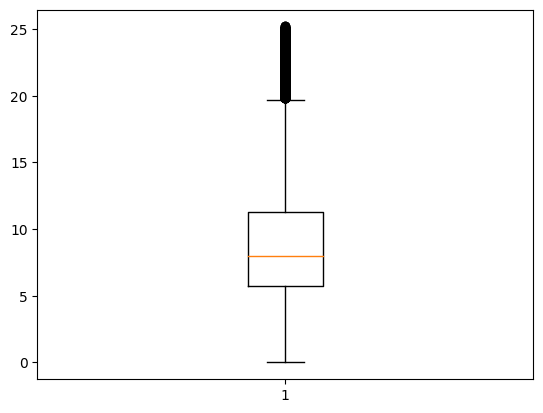

In [40]:
plt.boxplot(df['fare_amount'])

In [41]:
df.shape

(185906, 9)

In [42]:
#checking correlation
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000347,0.000228,-0.000913,0.000646,-0.000222,0.002500
fare_amount,0.000347,1.000000,0.001218,0.001424,-0.001458,-0.000373,0.012006
pickup_longitude,0.000228,0.001218,1.000000,-0.814223,0.837473,-0.851983,-0.000980
pickup_latitude,-0.000913,0.001424,-0.814223,1.000000,-0.769144,0.688514,-0.001337
dropoff_longitude,0.000646,-0.001458,0.837473,-0.769144,1.000000,-0.914544,0.000030
dropoff_latitude,-0.000222,-0.000373,-0.851983,0.688514,-0.914544,1.000000,-0.000594
passenger_count,0.002500,0.012006,-0.000980,-0.001337,0.000030,-0.000594,1.000000


In [43]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']

In [45]:
#Necessary to apply model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.score(x_test,y_test)

-4.822732471088109e-05

In [21]:
predict=model.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  4.53485033842184


-4.822732471088109e-05

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [25]:
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error
rfrmodelrmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE error for the model is ", rfrmodelrmse)

RMSE error for the model is  5.480683778120744
